In [1]:
ls

 Volume in drive E is Yuvraj
 Volume Serial Number is CE58-1D57

 Directory of E:\

07-06-2024  14:45    <DIR>          .ipynb_checkpoints
28-11-2022  05:43    <DIR>          abnormal_normal_eval
28-11-2022  05:43    <DIR>          abnormal_normal_train
18-12-2022  01:47    <DIR>          eeg_data_szr_eval
18-12-2022  01:50    <DIR>          eeg_data_szr_train
07-06-2024  14:45               337 eeg_szr_eval.ipynb
18-12-2022  01:47    <DIR>          szr_eval
               1 File(s)            337 bytes
               6 Dir(s)  927,166,210,048 bytes free


In [2]:
!pip install pyedflib

In [3]:
!pip install mne

   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.4 MB 14.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.4 MB 17.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.2/7.4 MB 22.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.3/7.4 MB 23.1 MB/s eta 0:00:01
   ------------------------------ --------- 5.7/7.4 MB 26.1 MB/s eta 0:00:01
   ------------------------------------- -- 6.9/7.4 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------- 7.4/7.4 MB 23.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB ? eta 0:00:00


Number of signals: 33
Signal labels: ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG C3P-REF', 'EEG C4P-REF', 'EEG SP1-REF', 'EEG SP2-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG 31-REF', 'EEG 32-REF', 'IBI', 'BURSTS', 'SUPPR']
Signal frequencies: [256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
 256. 256.   1.   1.   1.]
[24.93335929 24.76604816 24.59873702 24.59873702 24.43142589 24.43142589
 24.26411475 24.09680361 24.09680361 23.92949248]


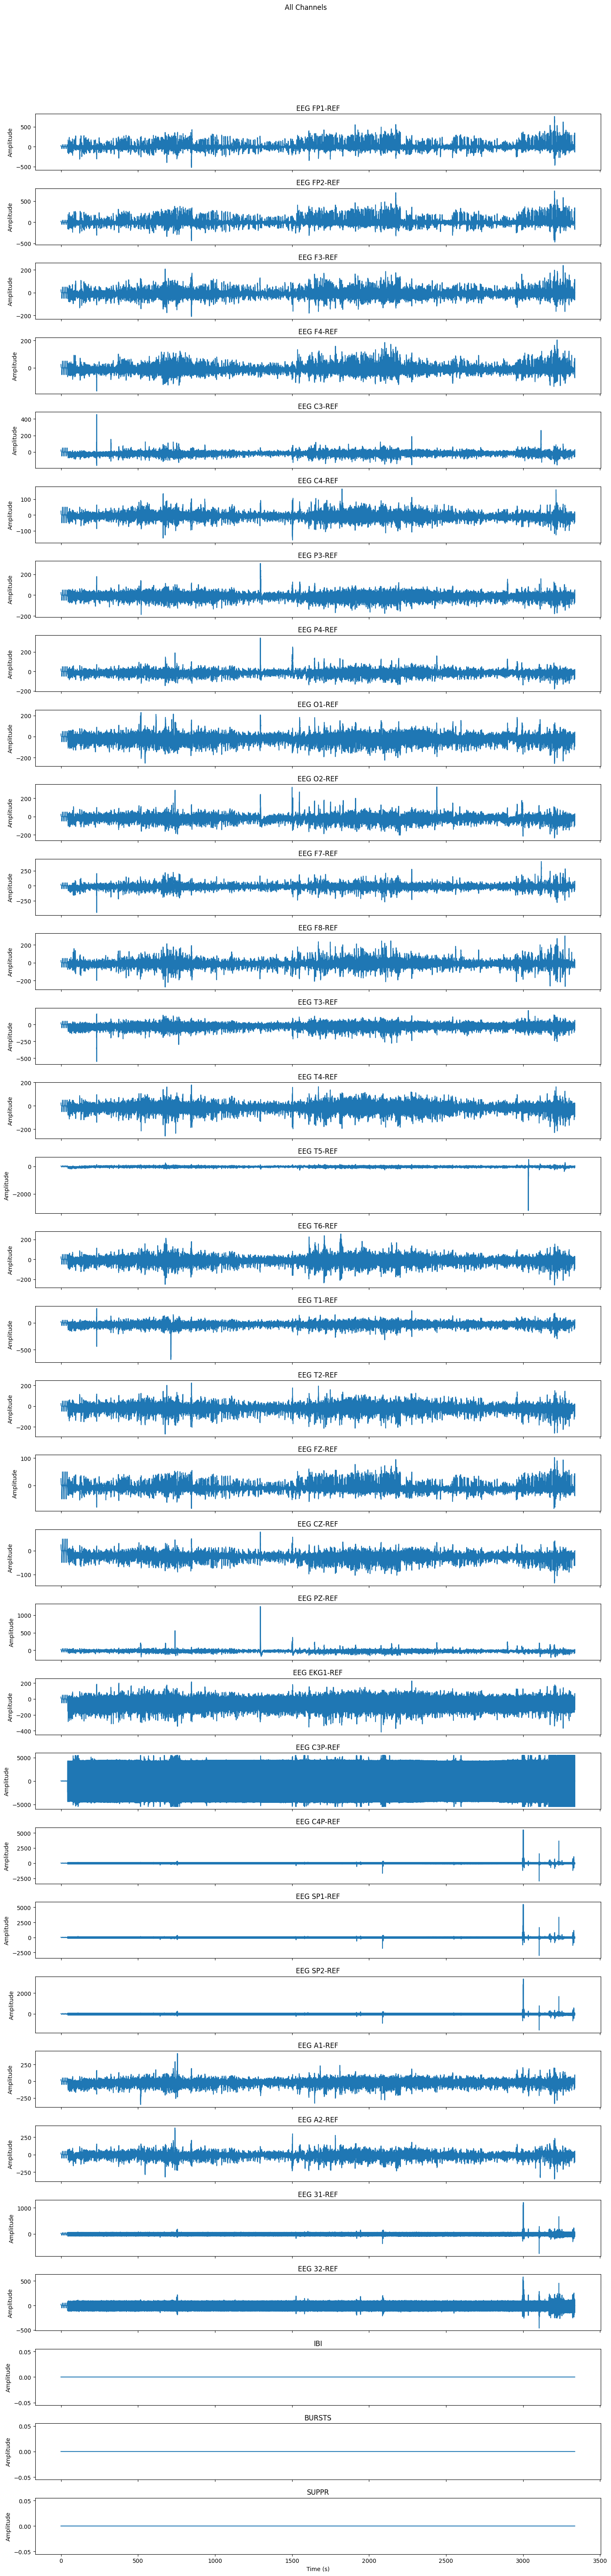

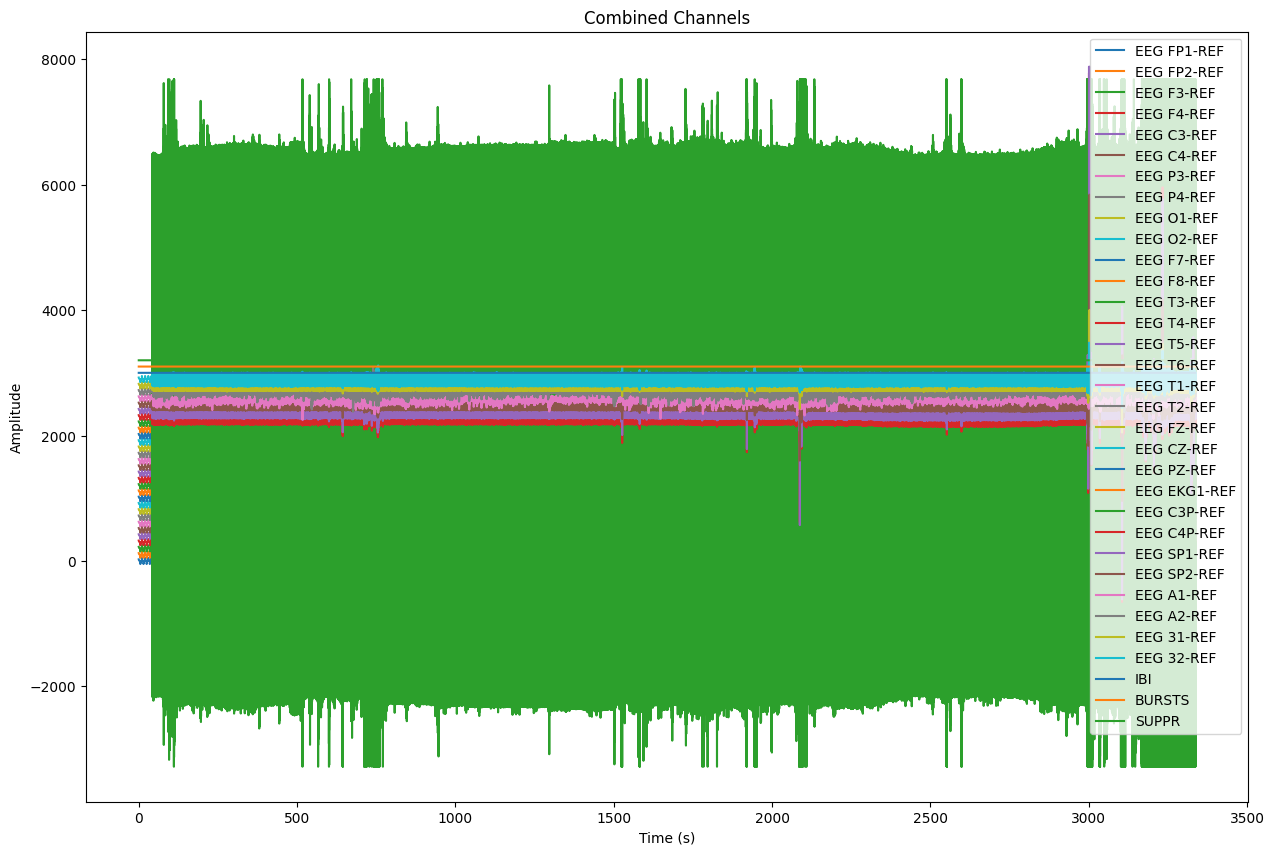

In [11]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt

# Path to the EDF file
edf_path = '/eeg_data_szr_eval/aaaaaaaq/s006_2014/01_tcp_ar/aaaaaaaq_s006_t000.edf'

# Reading the EDF file
f = pyedflib.EdfReader(edf_path)

# Getting basic information
n_signals = f.signals_in_file
signal_labels = f.getSignalLabels()
signal_freqs = f.getSampleFrequencies()

print(f"Number of signals: {n_signals}")
print(f"Signal labels: {signal_labels}")
print(f"Signal frequencies: {signal_freqs}")

# Reading all signals
signals = []
for i in range(n_signals):
    signal = f.readSignal(i)
    signals.append(signal)
f._close()

# Ensure signals are numpy arrays
signals = [np.asarray(signal) for signal in signals]

# Displaying the first few values of the first signal
print(signals[0][:10])

# Plotting all channels as subplots
fig, axs = plt.subplots(n_signals, 1, figsize=(15, 2 * n_signals), sharex=True)
fig.suptitle('All Channels')

for i, ax in enumerate(axs):
    # Create a time vector for each signal
    fs = signal_freqs[i]
    n_samples = len(signals[i])
    time = np.arange(n_samples) / fs
    
    ax.plot(time, signals[i])
    ax.set_title(signal_labels[i])
    ax.set_ylabel('Amplitude')
    if i == n_signals - 1:
        ax.set_xlabel('Time (s)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting combined channels in a single plot
plt.figure(figsize=(15, 10))
for i in range(n_signals):
    # Create a time vector for each signal
    fs = signal_freqs[i]
    n_samples = len(signals[i])
    time = np.arange(n_samples) / fs
    
    plt.plot(time, signals[i] + i * 100, label=signal_labels[i])  # Adding offset for better visualization

plt.title('Combined Channels')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()


Extracting EDF parameters from E:\eeg_data_szr_eval\aaaaaaaq\s006_2014\01_tcp_ar\aaaaaaaq_s006_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 854271  =      0.000 ...  3336.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2014-01-01 00:00:00 UTC
 nchan: 33
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>
Using matplotlib as 2D backend.


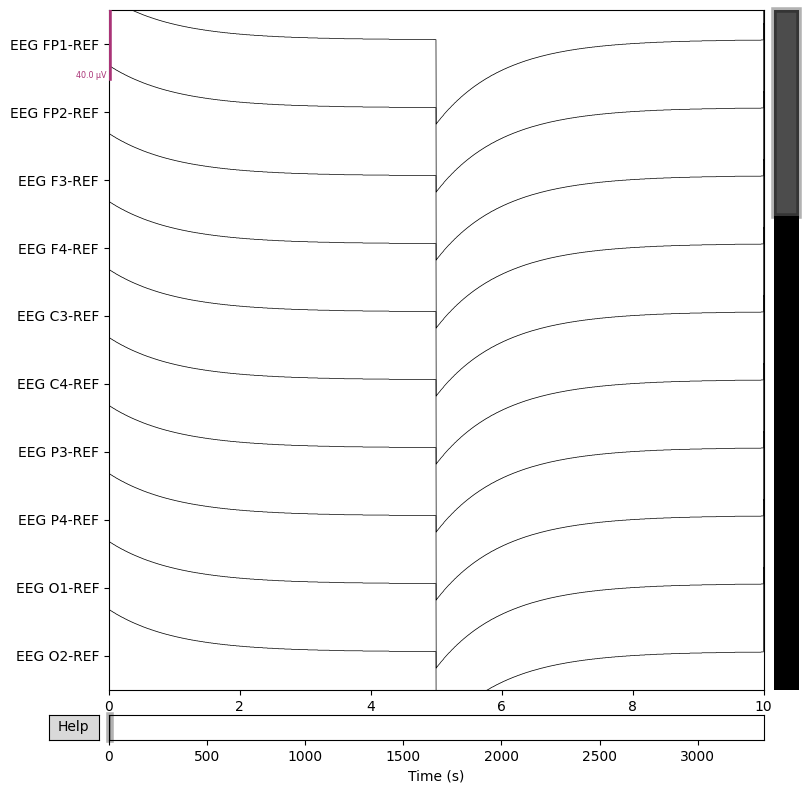

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\thein\AppData\Local\Temp\ipykernel_3280\1034458213.py:16: UserWarning: Zero value in spectrum for channels IBI, BURSTS, SUPPR
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Temp\ipykernel_3280\1034458213.py:16: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Temp\ipykernel_3280\1034458213.py:16: UserWarning: Infinite value in PSD for channels IBI, BURSTS, SUPPR.
These channels might be dead.
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Temp\ipykernel_3280\1034458213.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


[]


ValueError: No events in events array, cannot plot.

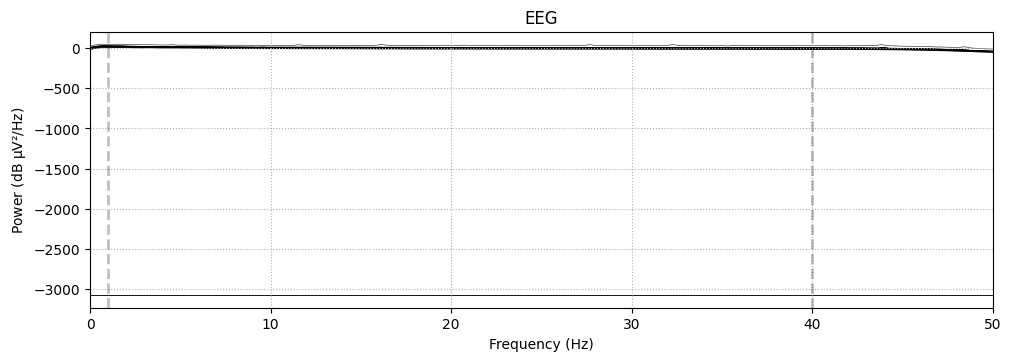

In [12]:
import mne

# Reading the EDF file
raw = mne.io.read_raw_edf(edf_path, preload=True)

# Display basic information about the data
print(raw.info)

# Plotting the raw data
raw.plot(n_channels=10, duration=10, start=0)

# Filtering the data (e.g., band-pass filter)
raw.filter(1., 40., fir_design='firwin')

# Plotting power spectral density
raw.plot_psd(fmax=50)

# Detecting events (assuming annotations in the file)
events, event_id = mne.events_from_annotations(raw)
print(events[:10])

# Plotting the events
mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)


Extracting EDF parameters from E:\eeg_data_szr_eval\aaaaaaaq\s006_2014\01_tcp_ar\aaaaaaaq_s006_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 854271  =      0.000 ...  3336.996 secs...
Available channels: ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG C3P-REF', 'EEG C4P-REF', 'EEG SP1-REF', 'EEG SP2-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG 31-REF', 'EEG 32-REF', 'IBI', 'BURSTS', 'SUPPR']
Bad channels: ['IBI', 'BURSTS', 'SUPPR']
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\thein\AppData\Local\Temp\ipykernel_3280\4141370406.py:31: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Temp\ipykernel_3280\4141370406.py:31: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
C:\Users\thein\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


ValueError: Missing channels from ch_names required by include:
['STIM_CHANNEL']

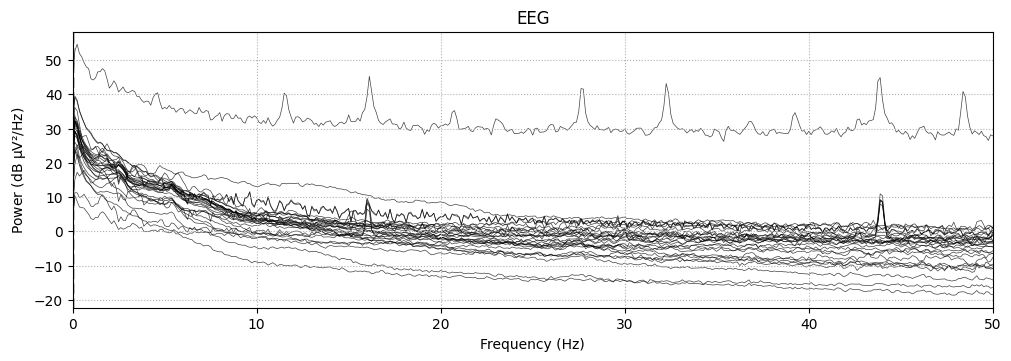

In [15]:
import mne
import numpy as np

# Path to the EDF file
edf_path = '/eeg_data_szr_eval/aaaaaaaq/s006_2014/01_tcp_ar/aaaaaaaq_s006_t000.edf'

# Reading the EDF file
raw = mne.io.read_raw_edf(edf_path, preload=True)

# Print all channel names to identify the correct stimulation channel
print("Available channels:", raw.info['ch_names'])

# Check for channels with zero or infinite values in the data
bad_channels = []

for ch_name in raw.ch_names:
    data, _ = raw[ch_name]
    if np.any(np.isinf(data)) or np.all(data == 0):
        bad_channels.append(ch_name)

print(f"Bad channels: {bad_channels}")

# Mark these channels as bad
raw.info['bads'] = bad_channels

# Check if channel locations are available
if not raw.info.get('chs')[0].get('loc')[:3].any():
    print("Channel locations not available. Disabling spatial colors.")
    raw.plot_psd(fmax=50, spatial_colors=False)
else:
    raw.plot_psd(fmax=50)

# Detect events using the correct stimulation channel
# Replace 'STIM_CHANNEL' with the actual channel name you identified
stim_channel = 'STIM_CHANNEL'
events = mne.find_events(raw, stim_channel=stim_channel, shortest_event=1)

if events.size == 0:
    print("No events detected. Please check the stim channel or event detection parameters.")
else:
    print(events[:10])
    # Plotting the events
    mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)



i want to make plot as for all channels as use 

# version = csv_v1.0.0				
# bname = aaaaaaaq_s006_t000				
# duration = 3337.00 secs				
# montage_file = $NEDC_NFC/lib/nedc_eas_default_montage.txt				
#				
channel	start_time	stop_time	label	confidence
T6-O2	1785.9697	2235.0909	fnsz	1
A1-T3	1832.0303	2043.5758	fnsz	1
A1-T3	2227.8788	2234.9091	fnsz	1
T3-C3	1832.0303	2043.5758	fnsz	1
T3-C3	2227.8788	2234.9091	fnsz	1
C3-CZ	1832.0303	2043.5758	fnsz	1
C3-CZ	2227.8788	2234.9091	fnsz	1
CZ-C4	1832.0303	2043.5758	fnsz	1
CZ-C4	2227.8788	2234.9091	fnsz	1
C4-T4	1832.0303	2043.5758	fnsz	1
FP1-F3	1832.2424	2043.3939	fnsz	1
FP1-F3	2228.0303	2235.0606	fnsz	1
F3-C3	1832.2424	2043.3939	fnsz	1
F3-C3	2228.0303	2235.0606	fnsz	1
F3-C3	2267.6061	2274.0909	fnsz	1
C3-P3	1832.2424	2043.3939	fnsz	1
C3-P3	2228.0303	2235.0606	fnsz	1
C3-P3	2267.6061	2274.0909	fnsz	1
P3-O1	1832.2424	2043.3939	fnsz	1
P3-O1	2228.0303	2235.0606	fnsz	1
P3-O1	2267.6061	2274.0909	fnsz	1


using this data make plots as highlight for this time frames for related channels as per data


# version = csv_v1.0.0				
# bname = aaaaaaaq_s006_t000				
# duration = 3337.00 secs				
# montage_file = $NEDC_NFC/lib/nedc_eas_default_montage.txt				
#				
channel	start_time	stop_time	label	confidence
T6-O2	1785.9697	2235.0909	fnsz	1
A1-T3	1832.0303	2043.5758	fnsz	1
A1-T3	2227.8788	2234.9091	fnsz	1
T3-C3	1832.0303	2043.5758	fnsz	1
T3-C3	2227.8788	2234.9091	fnsz	1
C3-CZ	1832.0303	2043.5758	fnsz	1
C3-CZ	2227.8788	2234.9091	fnsz	1
CZ-C4	1832.0303	2043.5758	fnsz	1
CZ-C4	2227.8788	2234.9091	fnsz	1
C4-T4	1832.0303	2043.5758	fnsz	1
FP1-F3	1832.2424	2043.3939	fnsz	1
FP1-F3	2228.0303	2235.0606	fnsz	1
F3-C3	1832.2424	2043.3939	fnsz	1
F3-C3	2228.0303	2235.0606	fnsz	1
F3-C3	2267.6061	2274.0909	fnsz	1
C3-P3	1832.2424	2043.3939	fnsz	1
C3-P3	2228.0303	2235.0606	fnsz	1
C3-P3	2267.6061	2274.0909	fnsz	1
P3-O1	1832.2424	2043.3939	fnsz	1
P3-O1	2228.0303	2235.0606	fnsz	1
P3-O1	2267.6061	2274.0909	fnsz	1
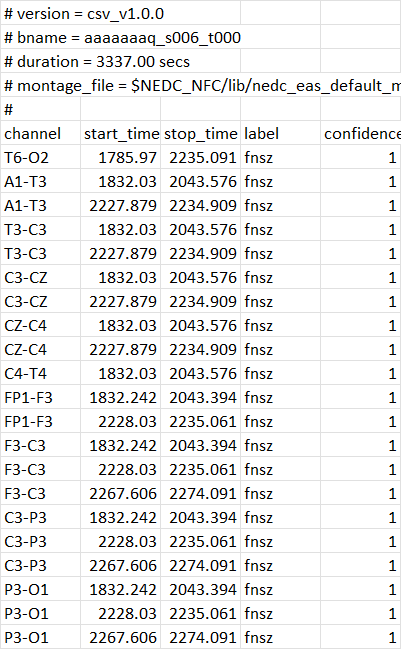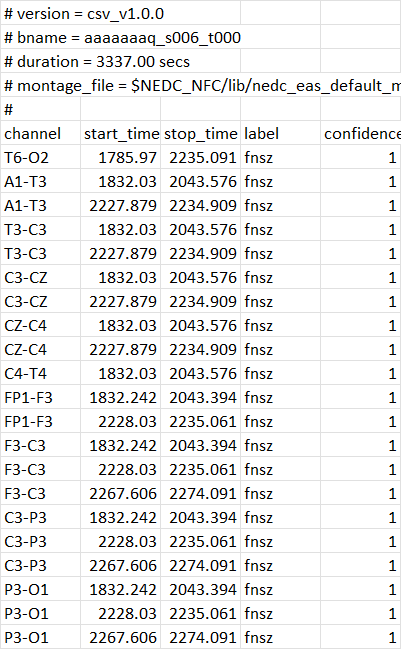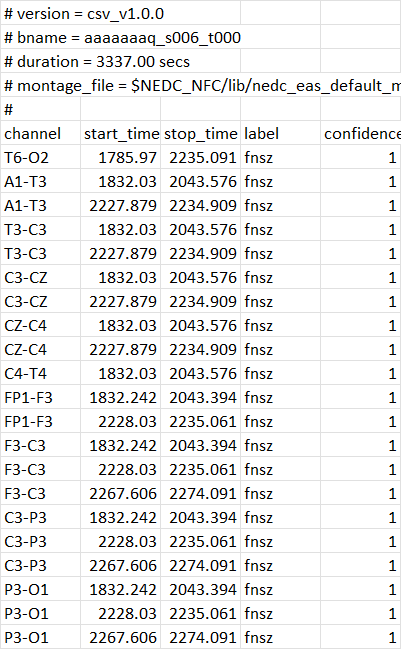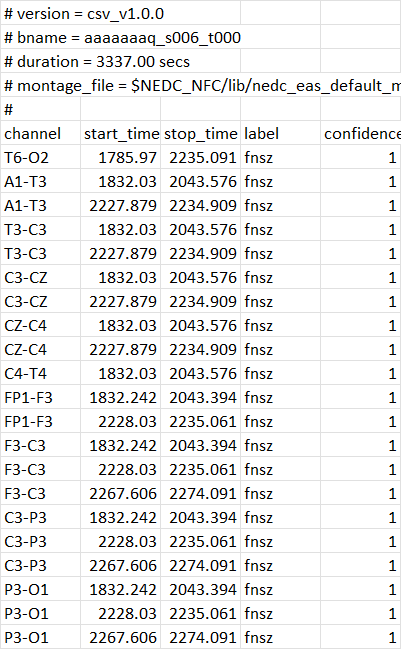

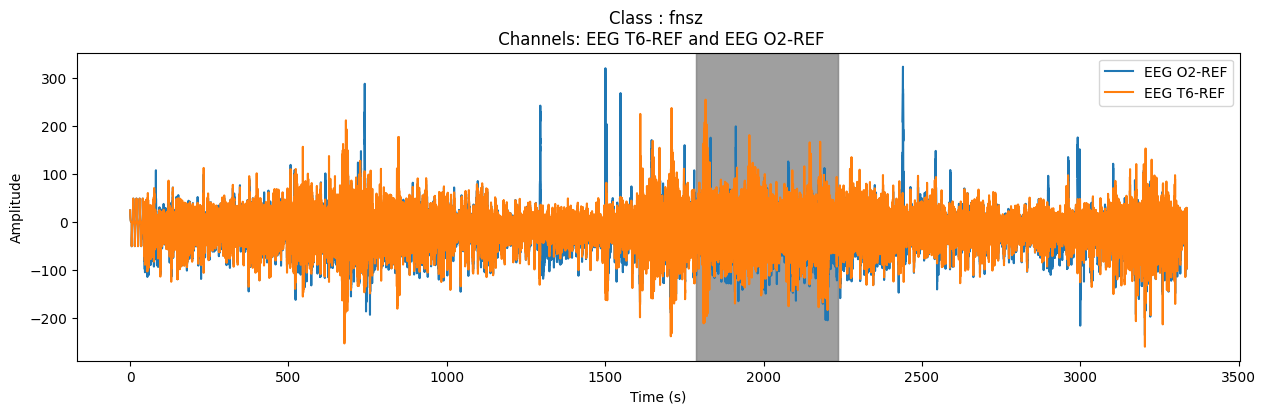

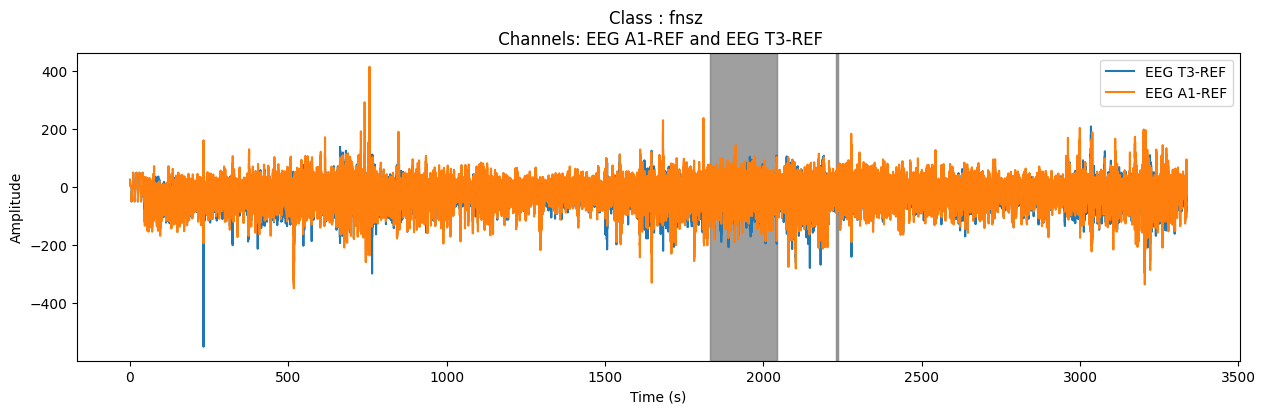

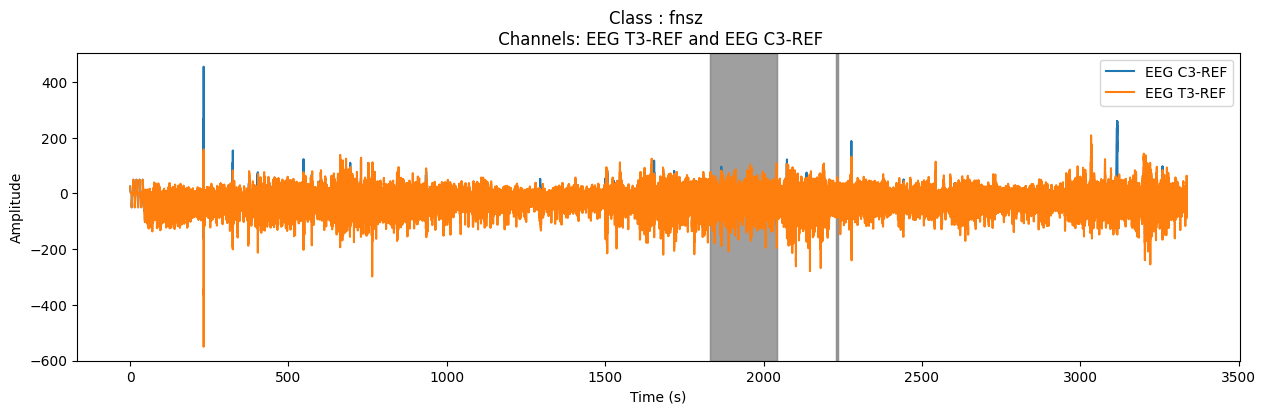

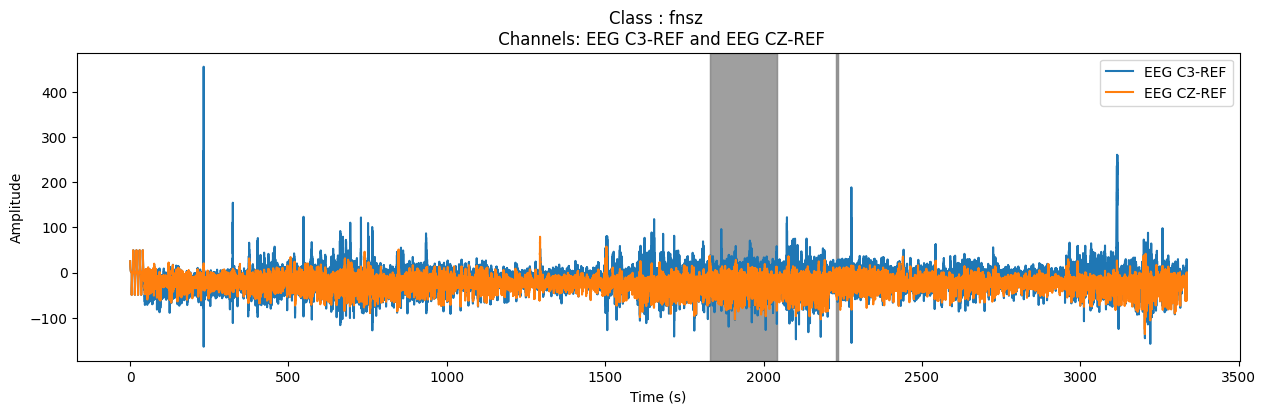

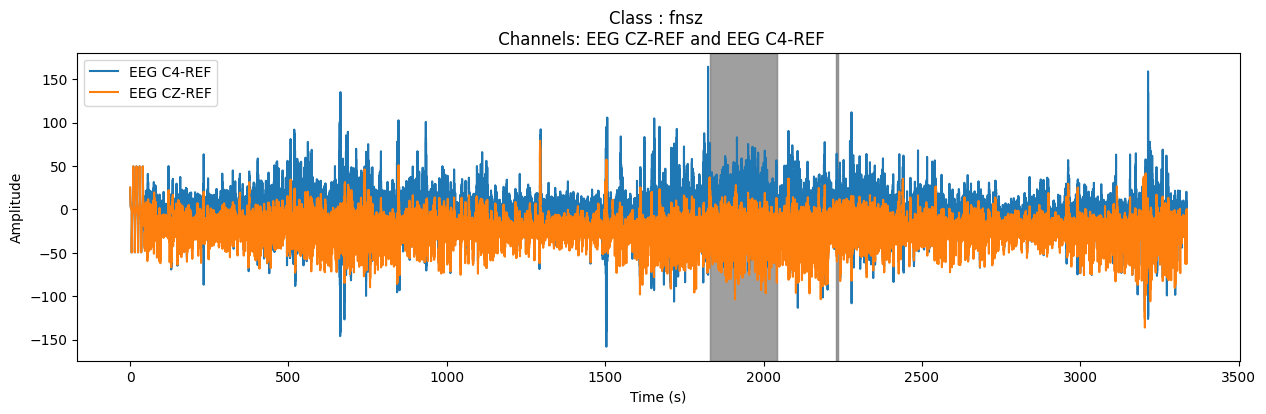

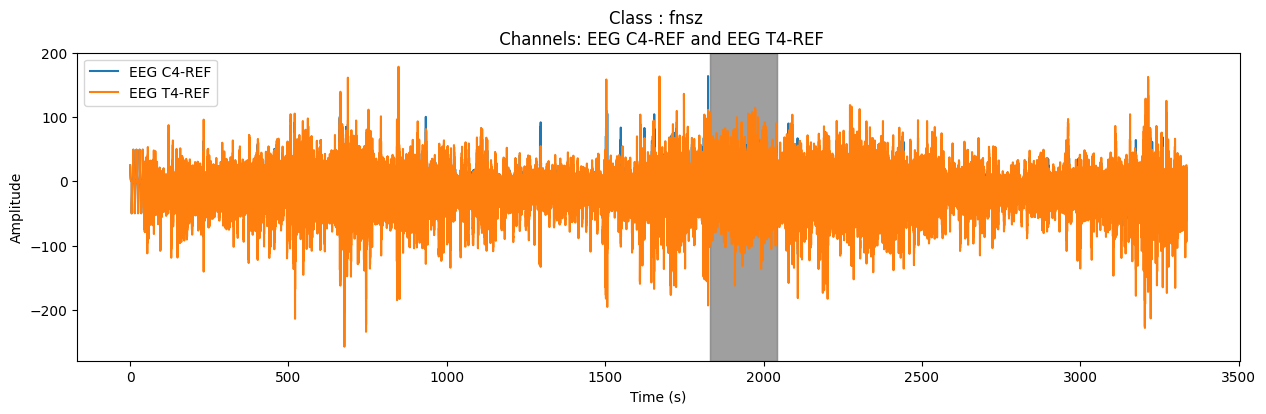

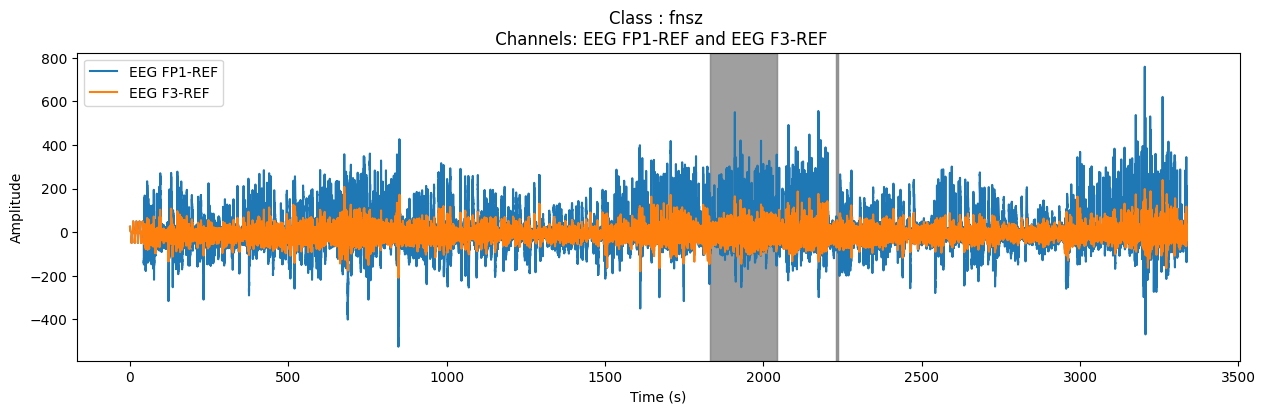

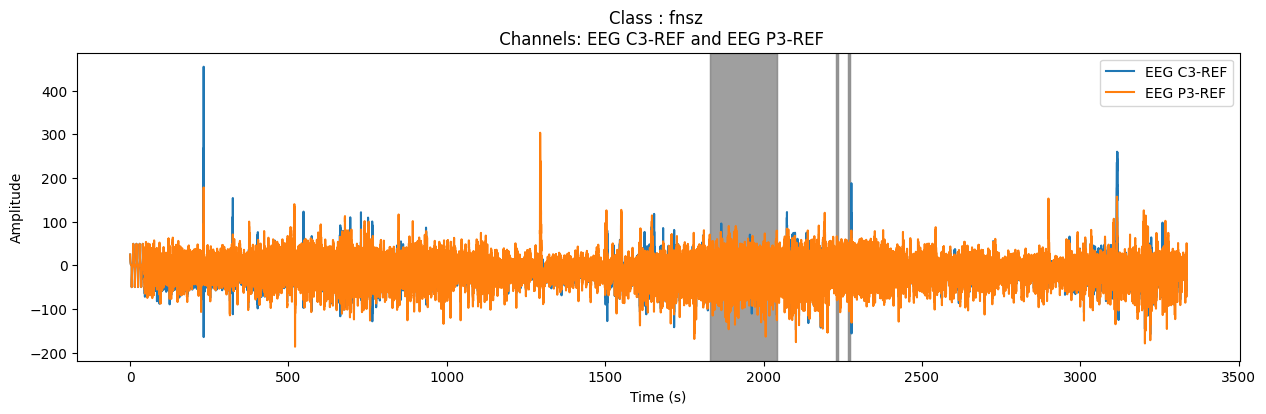

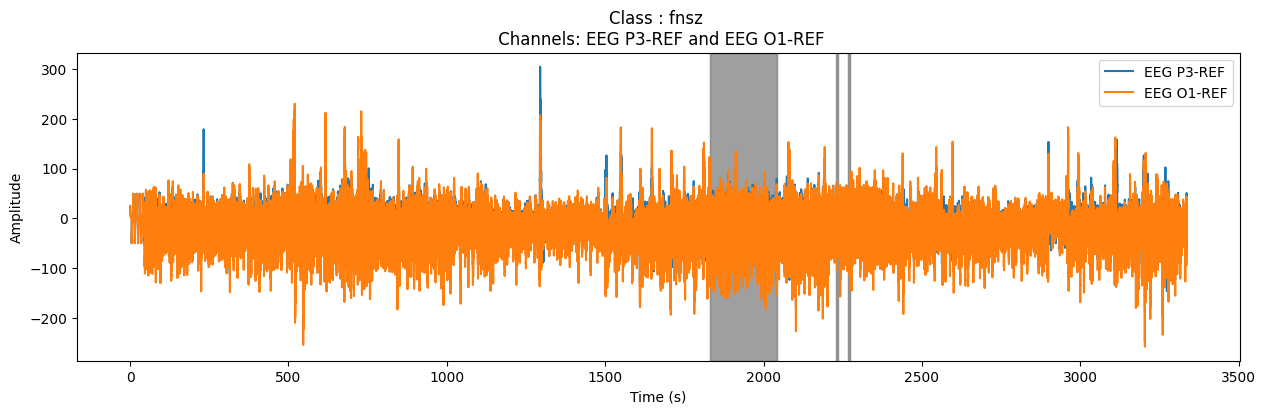

In [8]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to the EDF and Excel files
edf_path = '/eeg_data_szr_eval/aaaaaaaq/s006_2014/01_tcp_ar/aaaaaaaq_s006_t000.edf'
excel_path = '/eeg_data_szr_eval/aaaaaaaq/s006_2014/01_tcp_ar/aaaaaaaq_s006_t000.csv'  # Adjust the file path and extension accordingly

# Reading the EDF file
f = pyedflib.EdfReader(edf_path)

# Getting basic information
n_signals = f.signals_in_file
signal_labels = f.getSignalLabels()
signal_freqs = f.getSampleFrequencies()

# Reading all signals
signals = [f.readSignal(i) for i in range(n_signals)]
f._close()

# Read the metadata from the CSV file
metadata = pd.read_csv(excel_path, skiprows=5)

# Define montage mapping
montage_mapping = {
    'FP1-F7': ['EEG FP1-REF', 'EEG F7-REF'],
    'F7-T3': ['EEG F7-REF', 'EEG T3-REF'],
    'T3-T5': ['EEG T3-REF', 'EEG T5-REF'],
    'T5-O1': ['EEG T5-REF', 'EEG O1-REF'],
    'FP2-F8': ['EEG FP2-REF', 'EEG F8-REF'],
    'F8-T4': ['EEG F8-REF', 'EEG T4-REF'],
    'T4-T6': ['EEG T4-REF', 'EEG T6-REF'],
    'T6-O2': ['EEG T6-REF', 'EEG O2-REF'],
    'A1-T3': ['EEG A1-REF', 'EEG T3-REF'],
    'T3-C3': ['EEG T3-REF', 'EEG C3-REF'],
    'C3-CZ': ['EEG C3-REF', 'EEG CZ-REF'],
    'CZ-C4': ['EEG CZ-REF', 'EEG C4-REF'],
    'C4-T4': ['EEG C4-REF', 'EEG T4-REF'],
    'T4-A2': ['EEG T4-REF', 'EEG A2-REF'],
    'FP1-F3': ['EEG FP1-REF', 'EEG F3-REF'],
    'F3-C3': ['EEG F3-REF', 'EEG C3-REF'],
    'C3-P3': ['EEG C3-REF', 'EEG P3-REF'],
    'P3-O1': ['EEG P3-REF', 'EEG O1-REF'],
    'FP2-F4': ['EEG FP2-REF', 'EEG F4-REF'],
    'F4-C4': ['EEG F4-REF', 'EEG C4-REF'],
    'C4-P4': ['EEG C4-REF', 'EEG P4-REF'],
    'P4-O2': ['EEG P4-REF', 'EEG O2-REF']
}

# Plotting EEG signals with highlighted seizure periods for each channel
plotted_channels = set()  # To keep track of plotted channels
for index,i in enumerate(metadata['channel']):
    channel1, channel2 = montage_mapping[i][0], montage_mapping[i][1]
    channels = (channel1, channel2)
    class_ = metadata['label'][index]
    # Skip if both channels have already been plotted
    if all(channel in plotted_channels for channel in channels):
        continue

    plt.figure(figsize=(15, 4))
    plt.title(f'Class : {class_} \n Channels: {channel1} and {channel2}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for j in range(n_signals):
        if signal_labels[j] in channels:
            # Create a time vector for the signal
            fs = signal_freqs[j]
            n_samples = len(signals[j])
            time = np.arange(n_samples) / fs

            # Plot the signal
            plt.plot(time, signals[j], label=signal_labels[j])

            # Highlight seizure periods for the current channel
            for _, row in metadata.iterrows():
                if i in row['channel']:
                    start_time = row['start_time']
                    stop_time = row['stop_time']
                    plt.axvspan(start_time, stop_time, color='gray', alpha=0.5)

    # Update plotted channels
    plotted_channels.update(channels)

    # Add legend for the plotted channels
    plt.legend()
    plt.show()
